In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df_test=pd.read_csv("loandate/test.csv")
df_train=pd.read_csv("loandate/train.csv")

In [4]:
print(df_train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(df_train.shape)

(614, 13)


# exploration data analize

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
df_train.isnull().sum().sort_values(ascending=True)

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [9]:
#getout some feactures

In [10]:
df_train.drop(['Loan_ID'],inplace=True,axis=1)

In [11]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [12]:
##Stadiscic of our feactures

In [13]:
df_train.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [14]:
df_train.dropna(subset=["Gender","Loan_Amount_Term","Married","Dependents","LoanAmount","Self_Employed","Credit_History"],inplace=True)

In [15]:
df_train["Credit_History"]=df_train["Credit_History"].astype("object")

In [16]:
df_train.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [17]:
df_train.duplicated().any()

False

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Load Status

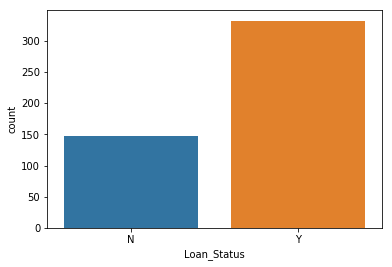

In [19]:
figsize=(7,5)
sns.countplot(df_train["Loan_Status"])

##historial credition###

# Credit History

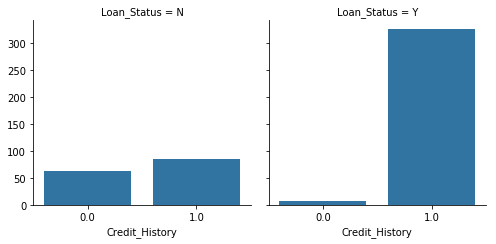

In [20]:
grid=sns.FacetGrid(df_train,col="Loan_Status",size=3.5)
grid.map(sns.countplot,"Credit_History")

#1:have more oporytunity
#0:have few oportunity
there is two groups

# Gender

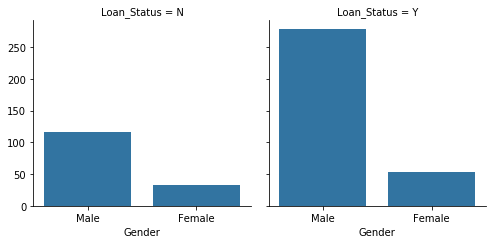

In [21]:
grid_gender=sns.FacetGrid(df_train,col="Loan_Status",size=3.5)
grid_gender.map(sns.countplot,"Gender")

In [22]:
Load_mean_amount=df_train.groupby(["Property_Area","Education"])["LoanAmount"].mean().reset_index()
pd.DataFrame(Load_mean_amount).head(6)

,Property_Area,Education,LoanAmount
0,Rural,Graduate,167.580952
1,Rural,Not Graduate,118.764706
2,Semiurban,Graduate,152.506410
3,Semiurban,Not Graduate,117.314286
4,Urban,Graduate,137.090164
5,Urban,Not Graduate,114.892857


# SEPARETA CATEGORICAL DATA AND  NUMERICAL_DATA

In [23]:
categorical_data=[]
numerical_data=[]
for i,c in enumerate(df_train.dtypes):
    if c==object:
        categorical_data.append(df_train.iloc[:,i])
    else:
        numerical_data.append(df_train.iloc[:,i])    

In [24]:
categorical_data=pd.DataFrame(categorical_data).transpose()
categorical_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y
5,Male,Yes,2,Graduate,Yes,1,Urban,Y


In [25]:
numerical_data=pd.DataFrame(numerical_data).transpose()
numerical_data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0
5,5417.0,4196.0,267.0,360.0


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Label_Values={"Y":1,"N":0}
Loan_Status_Label=categorical_data["Loan_Status"]
categorical_data.drop(["Loan_Status"],axis=1)
Loan_Status_Label=Loan_Status_Label.map(Label_Values)
le=le.fit(Loan_Status_Label)
print(le.classes_)

[0 1]


In [27]:
for i in categorical_data:
    categorical_data[i] =le.fit_transform(categorical_data[i])

In [28]:
train_Loan=pd.concat([categorical_data, numerical_data],axis=1)

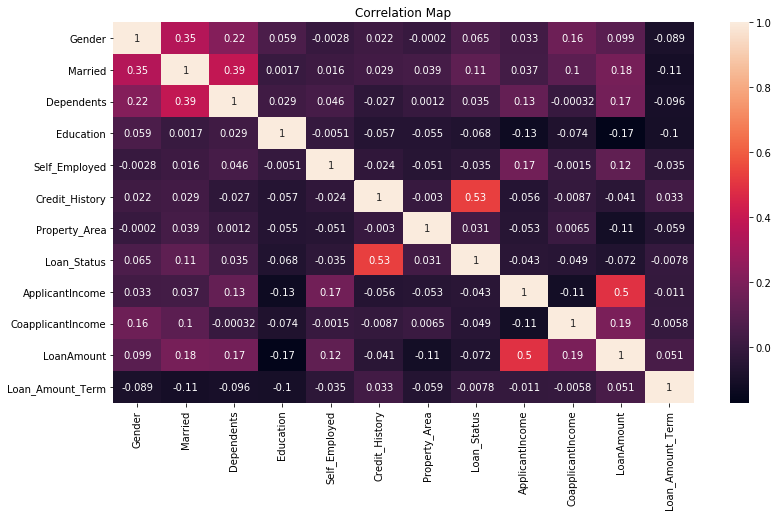

In [29]:
plt.figure(figsize=(13,7))
plt.title("Correlation Map")
sns.heatmap(train_Loan.corr(),annot=True)

# LOAN_STATUS AND CREDIT HISTORY
MODELING

In [30]:
from sklearn.model_selection import train_test_split
y=train_Loan["Loan_Status"]
X=train_Loan.drop(["Loan_Status"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=42)


In [31]:
names_shapes=[X_train, X_test, y_train, y_test]
for i in names_shapes:
    Shape=i.shape
    print(Shape)
    

(384, 11)
(96, 11)
(384,)
(96,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
_models=[LogisticRegression(random_state=28),KNeighborsClassifier(),DecisionTreeClassifier(max_depth=1,random_state=28),RandomForestClassifier(n_estimators=400,oob_score=True,random_state=28,n_jobs=-1),AdaBoostClassifier(random_state=28)]

In [33]:
import joblib

# traininig and Saving our model


In [34]:
def loss(y_true,y_pred,retu=False):
    pre=precision_score(y_true,y_pred)
    acu=accuracy_score(y_true,y_pred)
    if retu:
        return pre,acu
    else:
        print('prediction: %.3f\n accuracy:%.3f\n'%(pre,acu))
def train_models(model,X_train, X_test, y_train, y_test):
    ii=0
    for i in _models:
        i.fit(X_train,y_train)
        loss(y_test,i.predict(X_test))
        joblib.dump(i,str(ii)+"model.sav")
        ii=ii+1


In [35]:
train_models(_models,X_train, X_test, y_train, y_test)

prediction: 0.800
 accuracy:0.823

prediction: 0.716
 accuracy:0.656

prediction: 0.800
 accuracy:0.823

prediction: 0.815
 accuracy:0.823

prediction: 0.783
 accuracy:0.781

